# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from google.colab import files
data = files.upload()

In [ ]:
df=pd.read_csv("/content/Diamond Price Prediction.csv")

In [ ]:
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 11)

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
max(df['price'])

18823

In [ ]:
min(df['price'])

326

## **Exploratory Data Analysis**

<Axes: xlabel='cut', ylabel='price'>

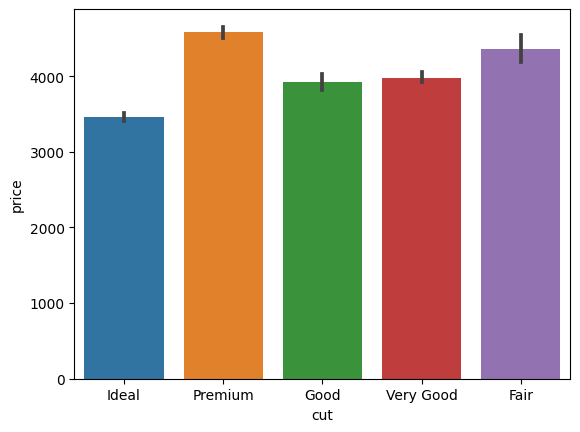

In [ ]:
sns.barplot(data=df,x=df['cut'],y=df['price'])

<Axes: xlabel='carat', ylabel='price'>

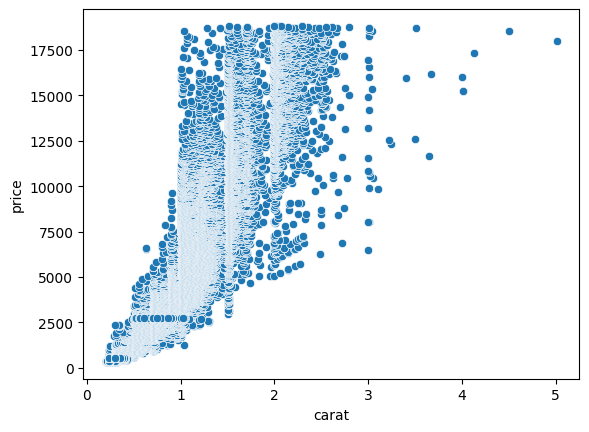

In [ ]:
sns.scatterplot(data=df,x=df['carat'],y=df['price'])

<Axes: xlabel='carat', ylabel='price'>

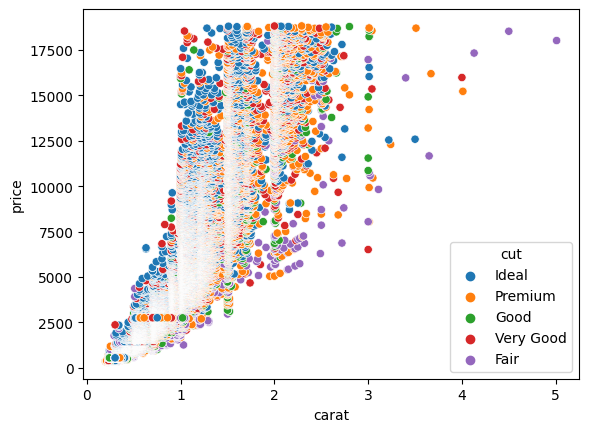

In [ ]:
sns.scatterplot(data=df,x=df['carat'],y=df['price'],hue=df['cut'])

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<Axes: xlabel='color', ylabel='price'>

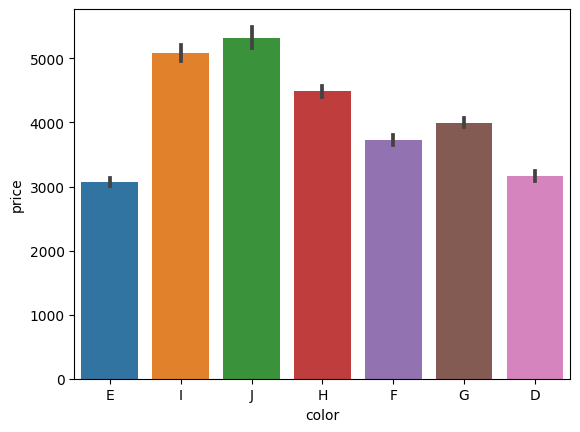

In [ ]:
sns.barplot(data=df,x=df['color'],y=df['price'])

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<Axes: xlabel='clarity', ylabel='price'>

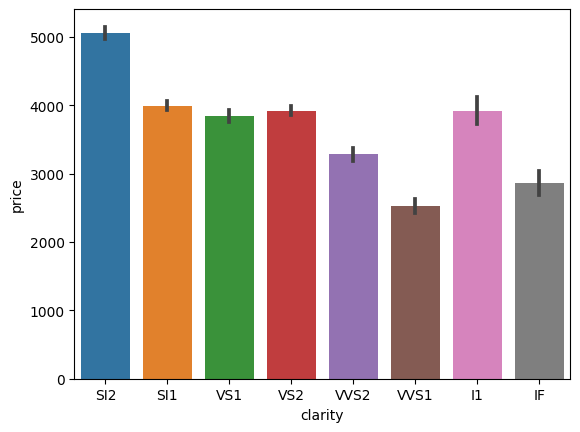

In [ ]:
sns.barplot(data=df,x=df['clarity'],y=df['price'])

# **Data Preprocessing**

In [ ]:
df.info

<bound method DataFrame.info of        carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]>

In [ ]:
#The first column seems to be just index
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

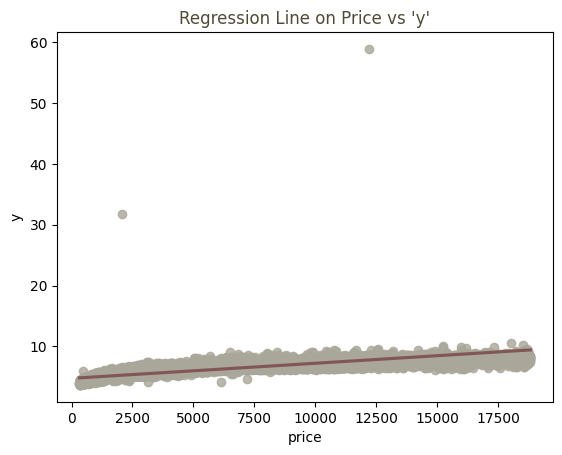

In [ ]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

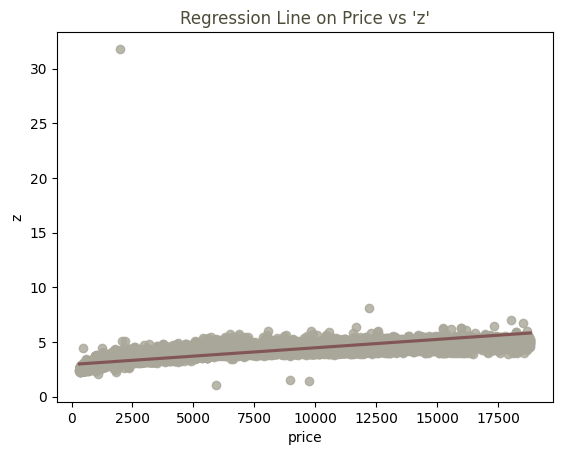

In [ ]:
ax= sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

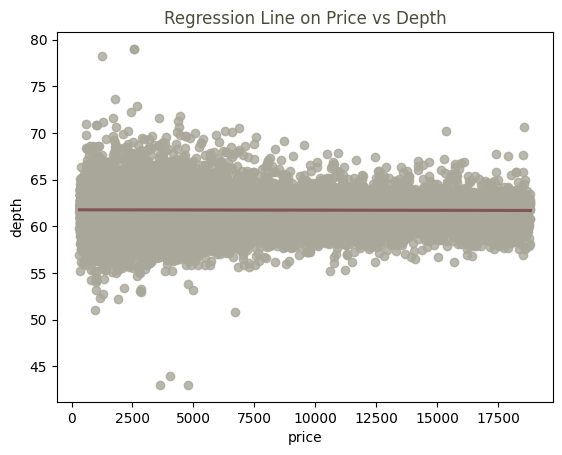

In [ ]:
ax= sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

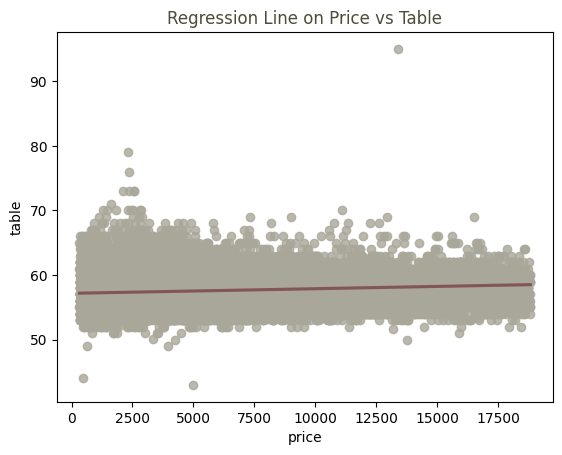

In [ ]:
ax=sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

In [ ]:
data = df[(df["depth"]<75)&(df["depth"]>45)]
data = df[(df["table"]<80)&(df["table"]>40)]
data = df[(df["x"]<30)]
data = df[(df["y"]<30)]
data = df[(df["z"]<30)&(df["z"]>2)]
data.shape

(53916, 10)

# **Feature Selection**

In [ ]:
# Make copy to avoid changing original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

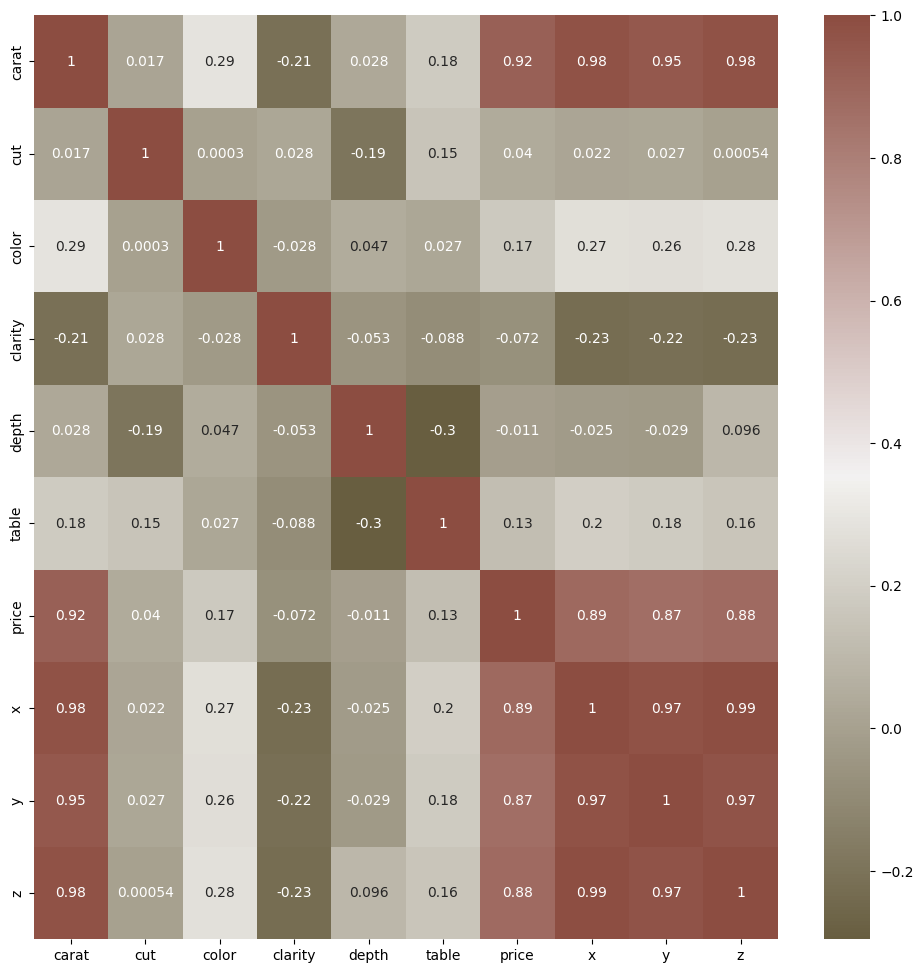

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

# **Model Building**

In [ ]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1354.149356 
DecisionTree: -742.540296 
RandomForest: -550.818430 
KNeighbors: -816.785294 
XGBRegressor: -541.982861 


# **Model Evaluation**

In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9800825044272685
Adjusted R^2: 0.9800691955357284
MAE: 281.19106547490577
MSE: 312855.3451320448
RMSE: 559.3347344229971
